### 1. Import Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

### 2 . Import Data

In [2]:
client_data=pd.read_csv("bank-full.csv",sep=';')
client_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
client_data.shape

(45211, 17)

In [4]:
client_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
columns= ['age','balance','duration','campaign','y']
client_data1=client_data[columns]
client_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


In [6]:
# datatype conversion
client_data1['y']=client_data['y'].astype('category')
client_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       45211 non-null  int64   
 1   balance   45211 non-null  int64   
 2   duration  45211 non-null  int64   
 3   campaign  45211 non-null  int64   
 4   y         45211 non-null  category
dtypes: category(1), int64(4)
memory usage: 1.4 MB


In [7]:
# datatype conversion
client_data1['outcome']=client_data1.y.map({'no':0,'yes':1})
client_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       45211 non-null  int64   
 1   balance   45211 non-null  int64   
 2   duration  45211 non-null  int64   
 3   campaign  45211 non-null  int64   
 4   y         45211 non-null  category
 5   outcome   45211 non-null  category
dtypes: category(2), int64(4)
memory usage: 1.5 MB


In [8]:
client_data1.tail()

,age,balance,duration,campaign,y,outcome
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


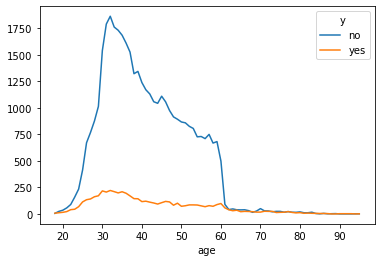

In [9]:
pd.crosstab(client_data1.age,client_data.y).plot(kind="line")
plt.show()

In [10]:
# The above graph shows age group 20-60 has more rejection of application

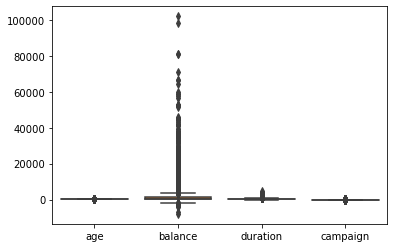

In [11]:
sns.boxplot(data=client_data1,orient="v")
plt.show()

In [12]:
# Checking for outliers


In [13]:
#Plot the distribution plot for the features



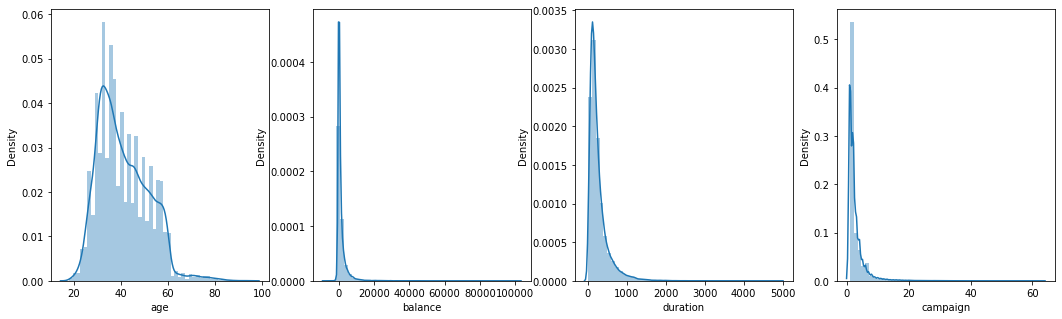

In [14]:
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
sns.distplot(client_data1['age'])
plt.subplot(1,4,2)
sns.distplot(client_data1['balance'])
plt.subplot(1,4,3)
sns.distplot(client_data1['duration'])
plt.subplot(1,4,4)
sns.distplot(client_data1['campaign'])
plt.show()

In [15]:
# Form a Box-plot for the skewed feature



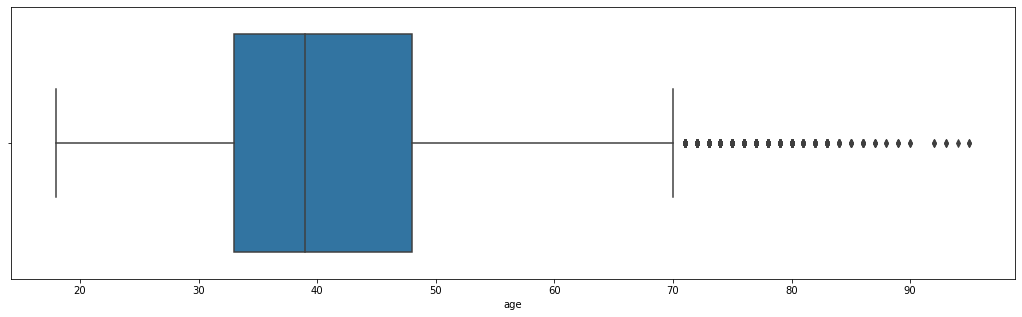

In [16]:
plt.figure(figsize=(18,5))

sns.boxplot(client_data1['age'])
plt.show()

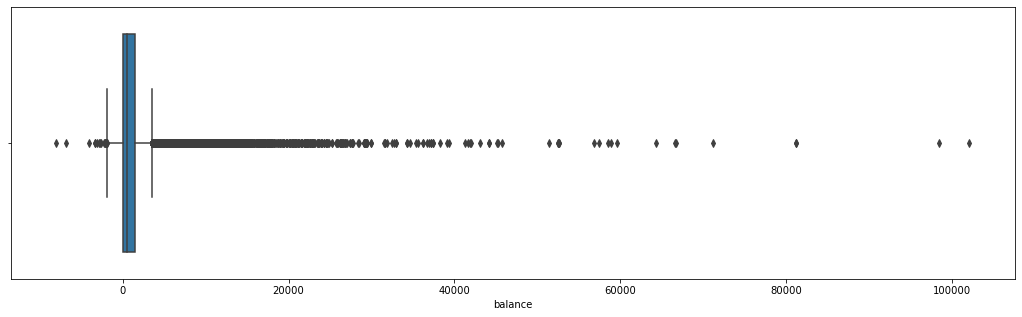

In [17]:
plt.figure(figsize=(18,5))

sns.boxplot(client_data1['balance'])
plt.show()

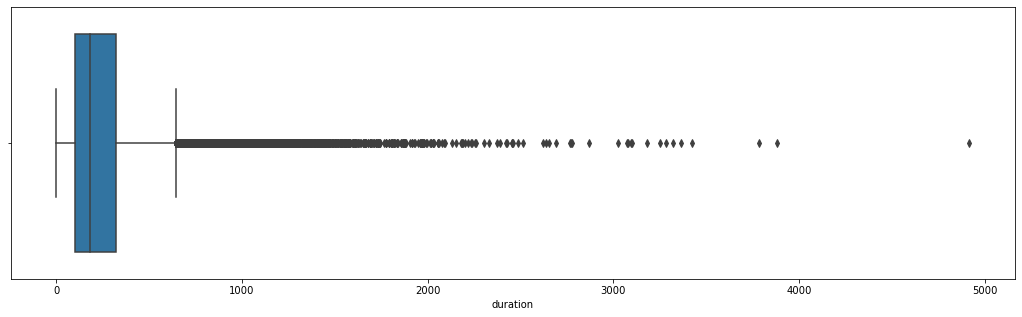

In [18]:
plt.figure(figsize=(18,5))

sns.boxplot(client_data1['duration'])
plt.show()

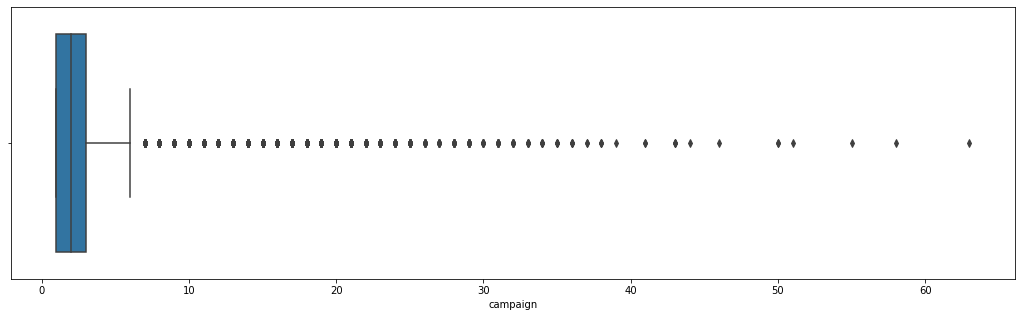

In [19]:
plt.figure(figsize=(18,5))

sns.boxplot(client_data1['campaign'])
plt.show()

### Finding Outliers

In [20]:
def find_outliers_IQR(client_data1):

   q1=client_data1.quantile(0.25)

   q3=client_data1.quantile(0.75)

   IQR=q3-q1

   outliers = client_data1[((client_data1<(q1-1.5*IQR)) | (client_data1>(q3+1.5*IQR)))]

   return outliers

In [21]:

outliers = find_outliers_IQR(client_data1[["age","campaign","balance","duration"]])

outliers

,age,campaign,balance,duration
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
45206,NaN,NaN,NaN,977.0
45207,71.0,NaN,NaN,NaN
45208,72.0,NaN,5715.0,1127.0
45209,NaN,NaN,NaN,NaN


### Cap the outliers


In [22]:

# Cap the outliers of feature = age
upper_limit_a = client_data1['age'].mean() + 3*client_data1['age'].std()

print(upper_limit_a)

lower_limit_a = client_data1['age'].mean()-3*client_data1['age'].std()

print(lower_limit_a)

72.79249633725466
9.079924091402077


In [23]:
#After calculating the upper and lower limit, we use the numpy .where() function to apply the limits to dataframe. 


client_data1['age'] = np.where(client_data1['age'] > upper_limit_a,upper_limit_a,np.where(client_data1['age'] < lower_limit_a,lower_limit_a,client_data1['age']))

client_data1.describe()[['age']]





,age
count,45211.000000
mean,40.889826
std,10.458640
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,72.792496


In [24]:
# Cap the outliers of feature = balance
upper_limit_b = client_data1['balance'].mean() + 3*client_data1['balance'].std()

print(upper_limit_b)

lower_limit_b = client_data1['balance'].mean()-3*client_data1['balance'].std()

print(lower_limit_b)

10496.569545190878
-7772.025429820724


In [25]:
client_data1['balance'] = np.where(client_data1['balance'] > upper_limit_b,upper_limit_b,np.where(client_data1['balance'] < lower_limit_b,lower_limit_b,client_data1['balance']))

client_data1.describe()[['balance']]


,balance
count,45211.000000
mean,1239.234494
std,2085.400698
min,-7772.025430
25%,72.000000
50%,448.000000
75%,1428.000000
max,10496.569545


In [26]:
 #Cap the outliers of feature = campaign
upper_limit_c = client_data1['campaign'].mean() + 3*client_data1['campaign'].std()

print(upper_limit_c)

lower_limit_c = client_data1['campaign'].mean()-3*client_data1['campaign'].std()

print(lower_limit_c)

12.057903308087548
-6.530221991593775


In [27]:
client_data1['campaign'] = np.where(client_data1['campaign'] > upper_limit_c,upper_limit_c,np.where(client_data1['campaign'] < lower_limit_c,lower_limit_c,client_data1['campaign']))

client_data1.describe()[['campaign']]


,campaign
count,45211.000000
mean,2.632957
std,2.319295
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,12.057903


In [28]:
 #Cap the outliers of feature = duration
upper_limit_d = client_data1['duration'].mean() + 3*client_data1['duration'].std()

print(upper_limit_d)

lower_limit_d = client_data1['duration'].mean()-3*client_data1['duration'].std()

print(lower_limit_d)

1030.746516576982
-514.4203570140437


In [29]:
client_data1['duration'] = np.where(client_data1['duration'] > upper_limit_d,upper_limit_d,np.where(client_data1['duration'] < lower_limit_d,lower_limit_d,client_data1['duration']))

client_data1.describe()[['duration']]


,duration
count,45211.000000
mean,250.772487
std,220.986371
min,0.000000
25%,103.000000
50%,180.000000
75%,319.000000
max,1030.746517


In [30]:
# Plotting the box plot to check whether the outlier is decreased or not.

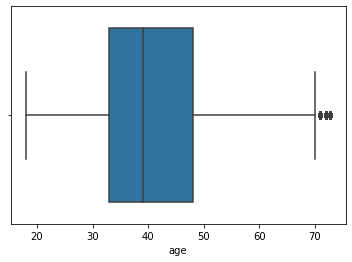

In [31]:
sns.boxplot(client_data1['age'])
plt.show()

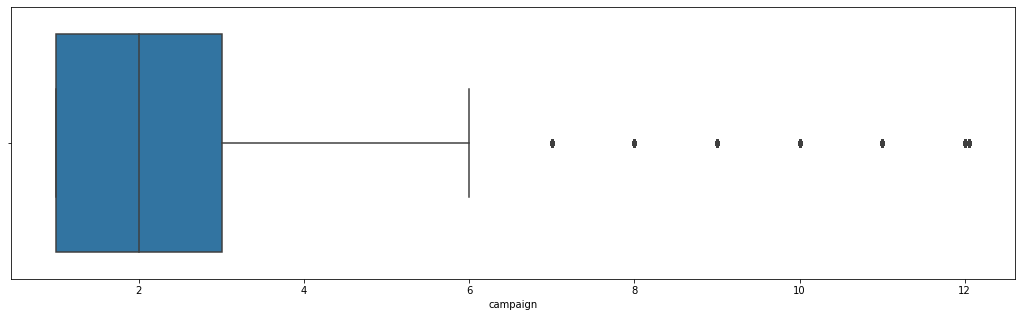

In [32]:
plt.figure(figsize=(18,5))

sns.boxplot(client_data1['campaign'])
plt.show()

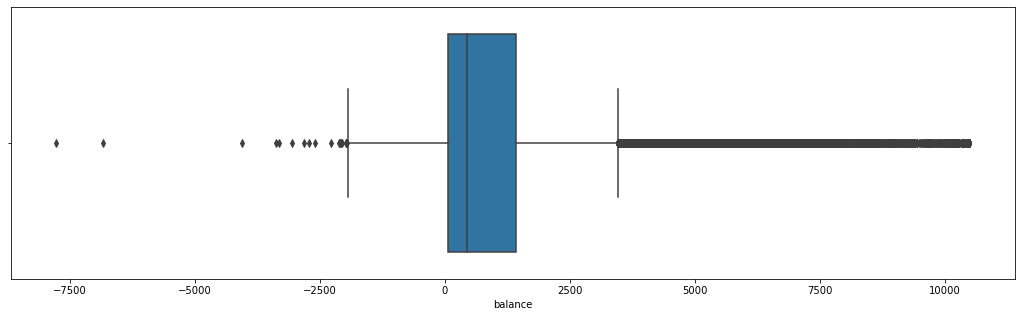

In [33]:
plt.figure(figsize=(18,5))

sns.boxplot(client_data1['balance'])
plt.show()

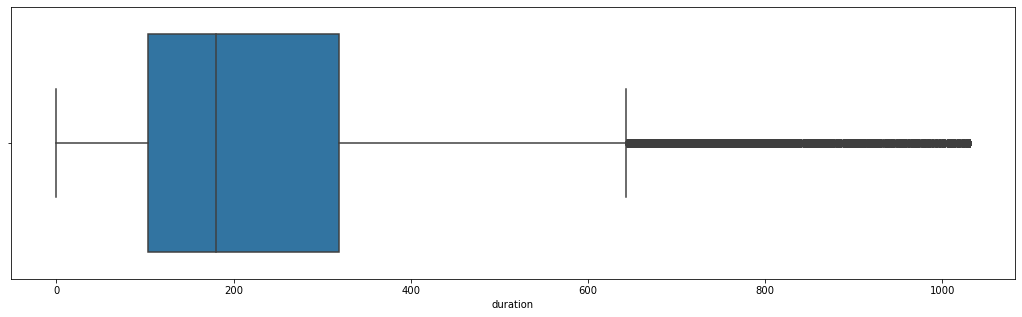

In [34]:
plt.figure(figsize=(18,5))

sns.boxplot(client_data1['duration'])
plt.show()

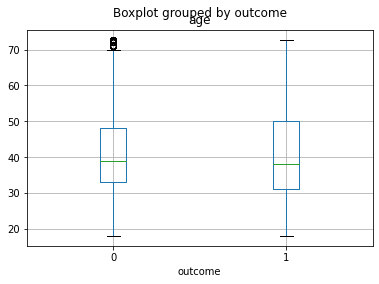

In [35]:
client_data1.boxplot(column='age',by='outcome')
plt.show()

In [36]:
# Dividing our data into input and output features

client_feature=['age','balance','duration','campaign']
target=['outcome']
x=client_data1[client_feature]
y=client_data1[target]

In [37]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [38]:
classifier.coef_

array([[ 6.30591868e-03,  8.36134615e-05,  4.25737637e-03,
        -1.52757180e-01]])

In [39]:
classifier.predict_proba(x)

array([[0.87562341, 0.12437659],
       [0.93613422, 0.06386578],
       [0.95588767, 0.04411233],
       ...,
       [0.24947768, 0.75052232],
       [0.8157715 , 0.1842285 ],
       [0.85091987, 0.14908013]])

In [40]:
y_pred=classifier.predict(x)
y_pred.dtype

dtype('int64')

In [41]:
from sklearn.metrics import confusion_matrix


In [42]:
confusion_matrix = confusion_matrix(y,y_pred)

In [43]:
confusion_matrix

array([[39113,   809],
       [ 4202,  1087]], dtype=int64)

Text(33.0, 0.5, 'Actual Value')

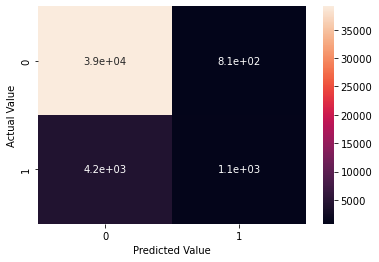

In [44]:
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')


In [45]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.21      0.30      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.62     45211
weighted avg       0.86      0.89      0.87     45211



In [ ]:
# Roc Curve

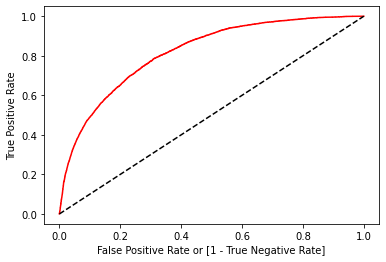

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()